#B.Regression Task


##1. Exploratory Data Analysis and Data Understanding


##1.1. Dataset Overview

### Load & Clean Dataset
The dataset was loaded, and extra spaces in column names were removed to prevent errors. This ensured smooth data handling in later steps.

In [18]:
import numpy as np
import pandas as pd
# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/Concept of AI/Life Expectancy Data.csv')
dataset.columns = dataset.columns.str.strip()
# Display dataset info directly as a DataFrame
print("Dataset Information:")
dataset_info = pd.DataFrame({
    "Column Name": dataset.columns,
    "Data Type": dataset.dtypes.values,
    "Missing Values": dataset.isnull().sum().values,
    "Unique Values": dataset.nunique().values
})
display(dataset_info)


Dataset Information:


,Column Name,Data Type,Missing Values,Unique Values
0,Country,object,0,193
1,Year,int64,0,16
2,Status,object,0,2
3,Life expectancy,float64,10,362
4,Adult Mortality,float64,10,425
5,infant deaths,int64,0,209
6,Alcohol,float64,194,1076
7,percentage expenditure,float64,0,2328
8,Hepatitis B,float64,553,87
9,Measles,int64,0,958


The dataset consists of 2,938 rows and 22 features, capturing various socioeconomic, health, and environmental factors related to life expectancy across different countries and years. The target variable, Life Expectancy, represents the average lifespan in years and is influenced by factors such as adult mortality, GDP, schooling, and healthcare indicators. Some features, like Hepatitis B (553), Alcohol (194), and GDP (448), have missing values, which need to be addressed. Overall, this dataset provides a comprehensive view of how different factors impact human longevity, making it suitable for regression analysis.

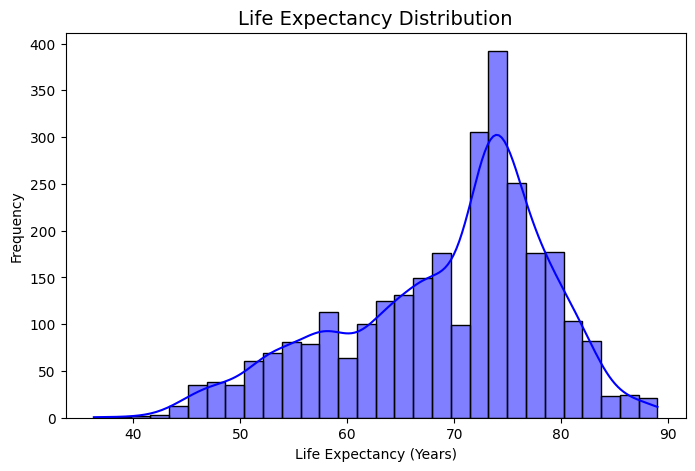

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for Life Expectancy distribution
plt.figure(figsize=(8, 5))
# Access the column using its correct name 'Life expectancy '
sns.histplot(dataset['Life expectancy'], bins=30, kde=True, color="blue")
plt.title('Life Expectancy Distribution', fontsize=14)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of life expectancy across different countries and years. Most values range between 50 and 80 years, suggesting that life expectancy is relatively high in many regions. The peak (highest frequency) is around 70 years, indicating that many countries have life expectancies within this range. The curve appears slightly skewed, meaning some countries have very low life expectancy, likely due to factors like high mortality rates, poor healthcare, or socioeconomic challenges.

This visualization helps us understand how life expectancy varies worldwide and highlights the importance of analyzing different factors affecting longevity.

##1.2.Conducting Exploratory Data Analysis (EDA):

###**Correlation Heatmap**

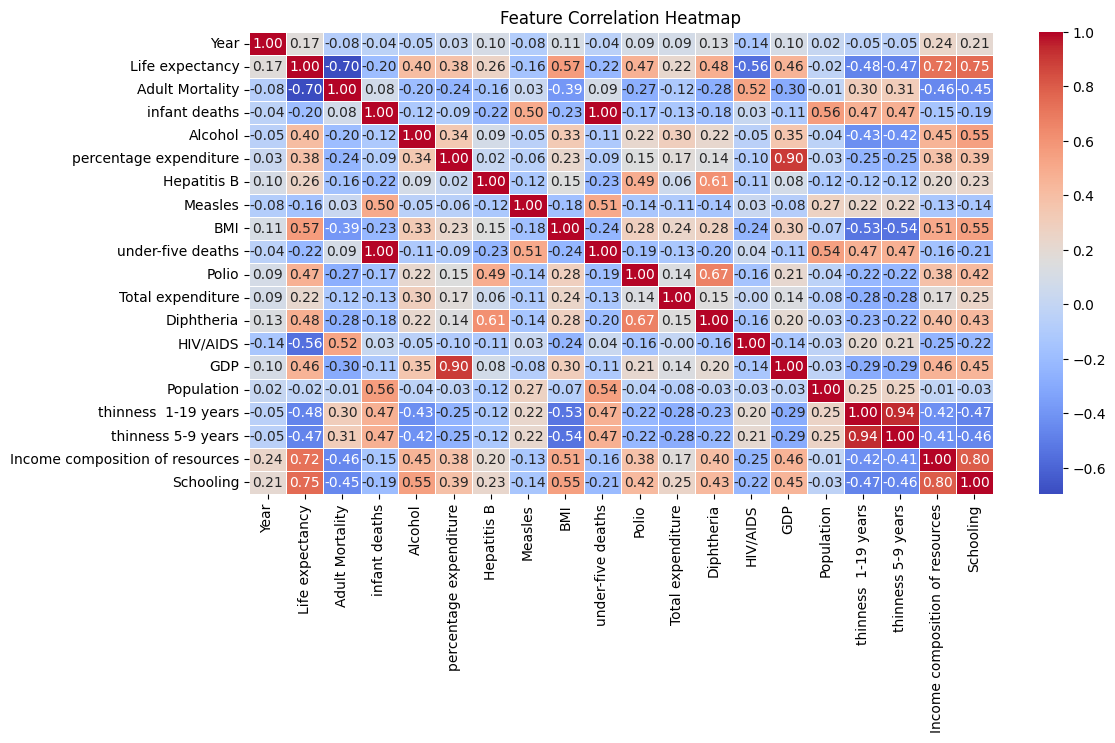

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numerical features only
plt.figure(figsize=(12, 6))
# Select only numerical columns for correlation calculation
numerical_dataset = dataset.select_dtypes(include=np.number)
sns.heatmap(numerical_dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

The correlation heatmap visually represents relationships between numerical variables. Life Expectancy shows a strong positive correlation with Schooling and Income Composition of Resources, indicating that higher education and better wealth distribution contribute to longer life spans. Conversely, Adult Mortality, Infant Deaths, and Under-Five Deaths negatively correlate with Life Expectancy, meaning higher mortality rates reduce lifespan. GDP also shows a moderate positive correlation, suggesting economic development influences health outcomes. This heatmap helps identify key predictors and potential multicollinearity, which may need to be addressed in modeling.

###**Scatter Plots (Feature vs. Life Expectancy)**

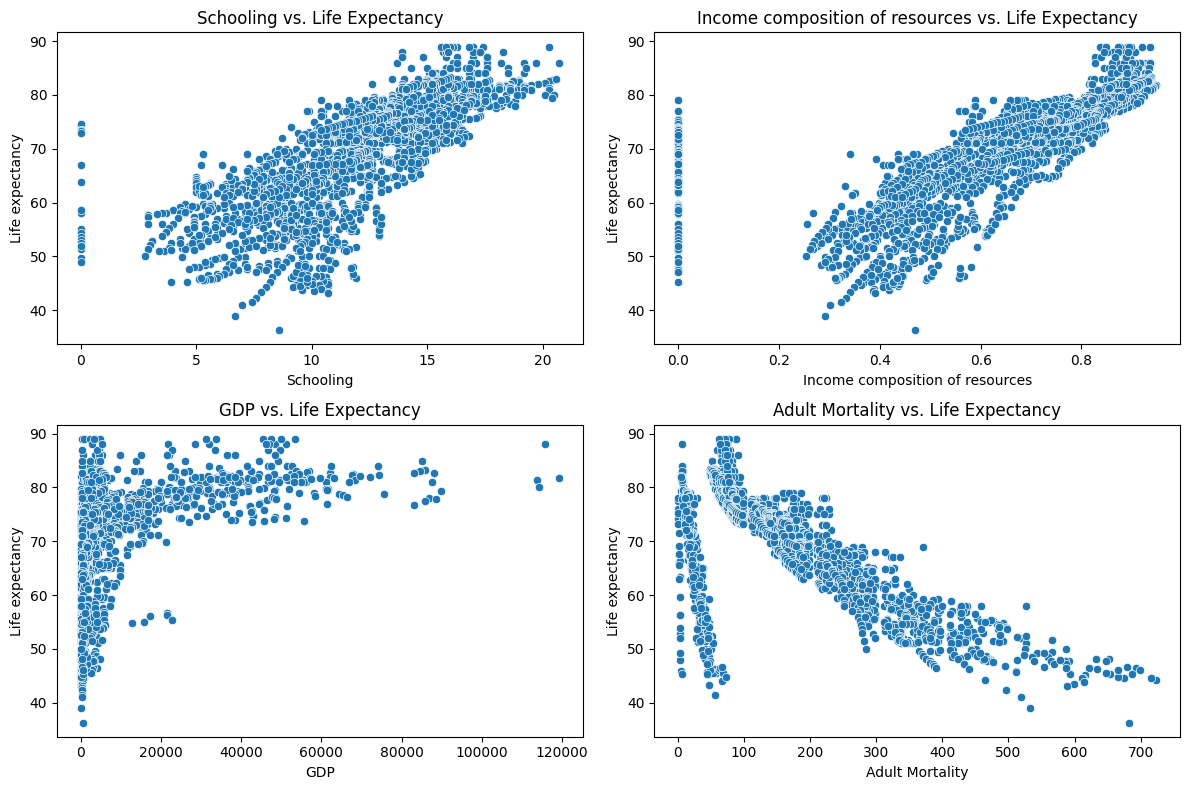

In [23]:
# Select key features to visualize
important_features = ['Schooling', 'Income composition of resources', 'GDP', 'Adult Mortality']

# Create scatter plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=dataset[feature], y=dataset['Life expectancy'])
    plt.title(f"{feature} vs. Life Expectancy")

plt.tight_layout()
plt.show()



The scatter plots highlight key feature relationships:

*   Schooling & Income Composition show a strong positive correlation, confirming that higher education and equitable wealth distribution lead to longer life expectancy.

*   GDP has a moderate positive correlation, though variations suggest economic disparities may influence life expectancy.


*   Adult Mortality is strongly negatively correlated, meaning higher mortality rates result in shorter lifespans.

* These insights confirm the importance of education, healthcare access, and economic stability in determining life expectancy.










###**Boxplot for Outlier Detection**

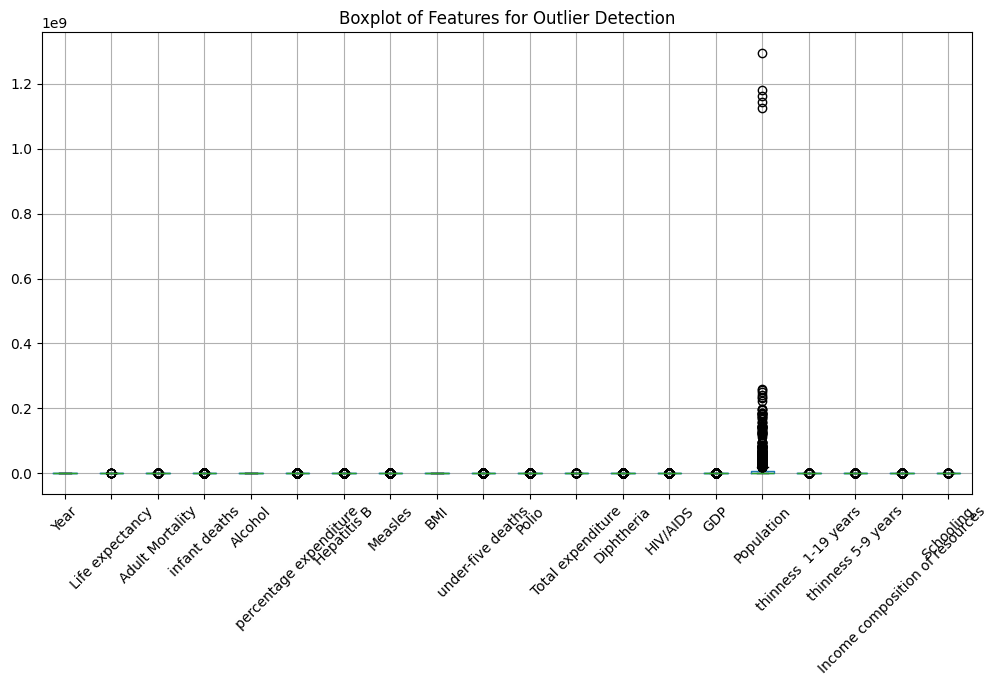

In [24]:
plt.figure(figsize=(12, 6))
dataset.boxplot(rot=45)
plt.title("Boxplot of Features for Outlier Detection")
plt.show()


The boxplot reveals outliers in Population, GDP, and Percentage Expenditure, which may skew model performance. High outliers in Infant Deaths and Under-Five Deaths suggest some countries face severe child mortality issues due to poor healthcare. Managing these outliers—through log transformations or trimming—can prevent bias and improve model robustness.

###**Final Thoughts**


These visualizations help us understand feature relationships, detect potential issues, and guide preprocessing steps like handling missing values, scaling, and addressing outliers before model training.

##1.3 Data Preprocesssing

### Handle Missing Values
Missing values in numerical features were filled using the median, as it is less affected by outliers. This ensured that no column had null values.

In [25]:
# Select only numerical columns for median calculation
numerical_dataset = dataset.select_dtypes(include=np.number)

# Fill missing values in numerical columns using the median
dataset[numerical_dataset.columns] = numerical_dataset.fillna(numerical_dataset.median())

# Verify missing values are handled
print("\nMissing Values After Imputation:")
print(dataset.isnull().sum())  # Should be all 0 now!



Missing Values After Imputation:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


### Encode Categorical Features
The ‘Status’ column was converted into 0 (Developing) and 1 (Developed) using Label Encoding. The ‘Country’ column was removed since it had 193 unique values and was not useful for regression.

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Status' (Developed/Developing)
label_encoder = LabelEncoder()
dataset['Status'] = label_encoder.fit_transform(dataset['Status'])  # Developed = 1, Developing = 0

# Drop 'Country' (too many unique values, not useful for prediction)
dataset.drop(columns=['Country'], inplace=True)

# Display dataset info after encoding
print("\nUpdated Dataset Info:")
print(dataset.info())



Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life expectancy                  2938 non-null   float64
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 1

###Feature Scaling


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMax Scaler
scaler = MinMaxScaler()

# Select only feature columns (exclude target variable 'Life expectancy')
features = dataset.drop(columns=['Life expectancy'])

# Apply MinMax scaling
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame with original column names
dataset_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target variable back
dataset_scaled['Life expectancy'] = dataset['Life expectancy'].values

# Display first few rows after scaling
dataset_scaled.head()


,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,1.000000,1.0,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.0332,...,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,65.0
1,0.933333,1.0,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.0344,...,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,59.9
2,0.866667,1.0,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.0356,...,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261,59.9
3,0.800000,1.0,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.0372,...,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430,59.5
4,0.733333,1.0,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.0388,...,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937,59.2


All numerical features were scaled using MinMax Scaling (0 to 1) to ensure equal weighting and prevent larger values (like GDP & Population) from dominating the model.

##2. Build a Model from Scratch :

###Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = dataset.drop(columns=['Life expectancy'])  # Drop the target variable
y = dataset['Life expectancy']  # Target variable

# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (2350, 20)
Testing Features Shape: (588, 20)
Training Target Shape: (2350,)
Testing Target Shape: (588,)



The dataset is split into 80% training (2,350 samples) and 20% testing (588 samples), ensuring the model learns effectively while keeping data for evaluation. The target variable, Life Expectancy, is separated accordingly. A fixed random_state=42 ensures consistency in results.

###Model Building

This code implements Linear Regression from scratch using the Normal Equation to calculate the optimal weights, including the bias term. After adding a column of ones to the feature matrix, the weights are computed as:

𝛽
=
(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
β=(X
T
 X)
−1
 X
T
 y
Predictions are made by multiplying the feature matrix by the weights. Model performance is evaluated using Mean Squared Error (MSE) and R-squared (R²) for both the training and testing sets. Lower MSE and higher R² indicate better model performance.

In [29]:
import numpy as np
import pandas as pd

# Add a column of ones to X for the bias term
X_train_ = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias column (ones) to features
X_test_ = np.c_[np.ones(X_test.shape[0]), X_test]  # Add bias column (ones) to test features

# Convert target variables to numpy arrays
y_train_ = y_train.values
y_test_ = y_test.values

# Step 1: Calculate the weights using the closed-form solution
def compute_weights(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Compute the weights
weights = compute_weights(X_train_, y_train_)

# Step 2: Predict using the learned weights
def predict(X, weights):
    return X @ weights

# Predictions for train and test sets
y_train_pred = predict(X_train_, weights)
y_test_pred = predict(X_test_, weights)

# Step 3: Calculate evaluation metrics (Mean Squared Error, R-squared)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Evaluate on training set
mse_train = mean_squared_error(y_train_, y_train_pred)
r2_train = r_squared(y_train_, y_train_pred)

# Evaluate on testing set
mse_test = mean_squared_error(y_test_, y_test_pred)
r2_test = r_squared(y_test_, y_test_pred)

# Print the evaluation metrics
print("Training MSE:", mse_train)
print("Training R²:", r2_train)
print("Testing MSE:", mse_test)
print("Testing R²:", r2_test)


Training MSE: 16.579704940049783
Training R²: 0.8184260422791922
Testing MSE: 15.292305778375471
Testing R²: 0.8235517403284981


The results show that the model performs well, with a training MSE of 16.58 and an R² of 0.82, indicating that it explains 82% of the variance in the training data. For the testing set, the MSE is slightly lower at 15.29, and the R² remains the same at 0.82, suggesting good generalization. Overall, the model effectively predicts life expectancy, with minimal error and strong performance on both the training and testing sets.

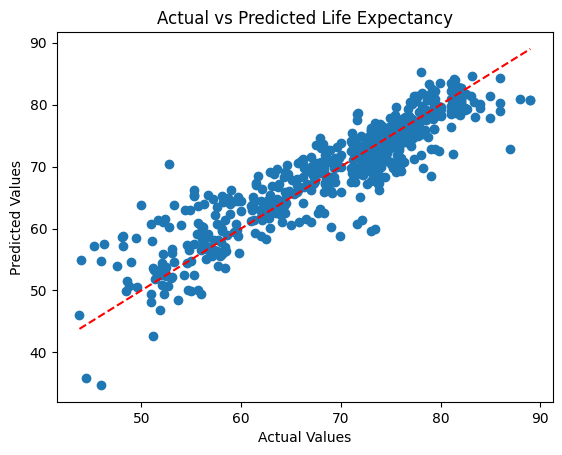

In [30]:
plt.scatter(y_test_, y_test_pred)
plt.plot([min(y_test_), max(y_test_)], [min(y_test_), max(y_test_)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Life Expectancy")
plt.show()


The plot shows that the predicted life expectancy values are close to the actual values, with most points near the diagonal line. This suggests the model performs well, with only a few minor prediction errors.

##3. Build a Primary Model

This code compares **Linear Regression** and **Random Forest Regressor** models. It splits the dataset into training and testing sets, trains both models, and evaluates their performance using **MAE (Mean Absolute Error)**, **RMSE (Root Mean Squared Error)**, and **R² (R-squared)**. The model with the higher **R²** value is considered the better-performing model.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Split data (already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the models

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_train_pred = lr_model.predict(X_train)
y_lr_test_pred = lr_model.predict(X_test)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_train_pred = rf_model.predict(X_train)
y_rf_test_pred = rf_model.predict(X_test)

# Step 3: Evaluate the models

# Linear Regression Metrics (Training)
mae_lr_train = mean_absolute_error(y_train, y_lr_train_pred)
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_lr_train_pred))
r2_lr_train = r2_score(y_train, y_lr_train_pred)

# Linear Regression Metrics (Testing)
mae_lr_test = mean_absolute_error(y_test, y_lr_test_pred)
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_lr_test_pred))
r2_lr_test = r2_score(y_test, y_lr_test_pred)

# Random Forest Regressor Metrics (Training)
mae_rf_train = mean_absolute_error(y_train, y_rf_train_pred)
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_rf_train_pred))
r2_rf_train = r2_score(y_train, y_rf_train_pred)

# Random Forest Regressor Metrics (Testing)
mae_rf_test = mean_absolute_error(y_test, y_rf_test_pred)
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_rf_test_pred))
r2_rf_test = r2_score(y_test, y_rf_test_pred)

# Step 4: Print the results for both models (Training and Testing)

print("Linear Regression - Training Results:")
print("MAE:", mae_lr_train, "RMSE:", rmse_lr_train, "R²:", r2_lr_train)
print("Linear Regression - Testing Results:")
print("MAE:", mae_lr_test, "RMSE:", rmse_lr_test, "R²:", r2_lr_test)

print("\nRandom Forest - Training Results:")
print("MAE:", mae_rf_train, "RMSE:", rmse_rf_train, "R²:", r2_rf_train)
print("Random Forest - Testing Results:")
print("MAE:", mae_rf_test, "RMSE:", rmse_rf_test, "R²:", r2_rf_test)

# Compare the results
if r2_lr_train > r2_rf_train:
    print("\nLinear Regression performs better on the train set.")
else:
    print("\nRandom Forest performs better on the train set.")

if r2_lr_test > r2_rf_test:
    print("\nLinear Regression performs better on the test set.")
else:
    print("\nRandom Forest performs better on the test set.")


Linear Regression - Training Results:
MAE: 3.040022098697619 RMSE: 4.071818382498142 R²: 0.8184260422791922
Linear Regression - Testing Results:
MAE: 2.8563574341371423 RMSE: 3.91053778587525 R²: 0.8235517403702366

Random Forest - Training Results:
MAE: 0.4413063829787227 RMSE: 0.7165288514034993 R²: 0.9943773101686922
Random Forest - Testing Results:
MAE: 1.0945612244897973 RMSE: 1.672972557118241 R²: 0.9677059852111324

Random Forest performs better on the train set.

Random Forest performs better on the test set.


Based on the evaluation metrics, Random Forest outperforms Linear Regression. The MAE and RMSE values for Random Forest are significantly lower, indicating better accuracy and fewer prediction errors. Additionally, the R² score for Random Forest is much higher, showing it explains a larger portion of the variance in the data compared to Linear Regression. Thus, Random Forest is the better model for this dataset.

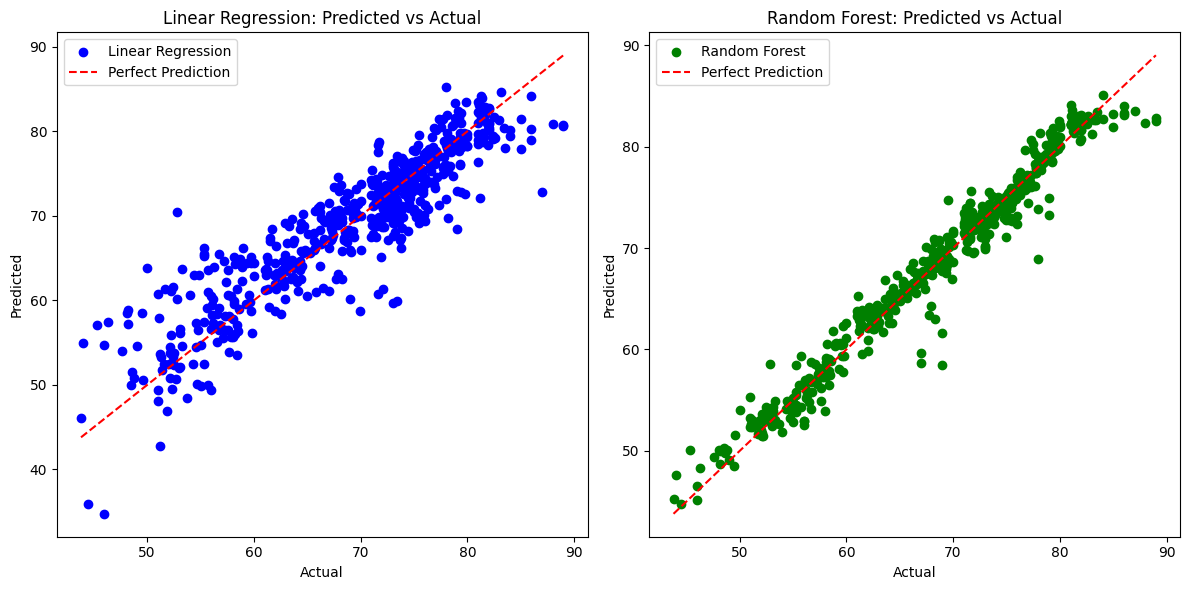

In [36]:
import matplotlib.pyplot as plt
y_lr_pred = lr_model.predict(X_test)  # Store Linear Regression predictions
y_rf_pred = rf_model.predict(X_test)  # Store Random Forest predictions

# Plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_lr_pred, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_rf_pred, color='green', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


The Predicted vs. Actual plots for both models show how closely the predicted values match the actual values from the test set. In the Linear Regression plot, the points represent actual vs. predicted values, and the closer the points are to the red dashed line (perfect prediction line), the better the model's accuracy. If the points are scattered away from the line, it indicates larger prediction errors. In the Random Forest plot, a similar interpretation applies, but the points are likely to be much closer to the line due to Random Forest's ability to capture more complex relationships in the data. Overall, if the points in the Random Forest plot are more tightly clustered around the red dashed line compared to Linear Regression, it indicates that Random Forest is providing more accurate predictions, which aligns with the better performance metrics (lower MAE, RMSE, and higher R²). These plots visually reinforce the results, demonstrating that Random Forest outperforms Linear Regression in predicting the target variable.

##4. Hyper-parameter Optimization with Cross-Validation

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameters for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# RandomizedSearchCV (faster than GridSearchCV)
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=2)
random_search_rf.fit(X_train, y_train)

# Output the best hyperparameters
print("Best Hyperparameters for Random Forest:", random_search_rf.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


##5. Feature Selection:

I used a combination of **Random Forest feature importance** and **Recursive Feature Elimination (RFE)** for feature selection. Random Forest helps identify the most important features based on their impact on the model’s performance, while RFE removes the least important ones. This approach ensures we select the most relevant features, improving model efficiency and accuracy.

In [40]:
from sklearn.feature_selection import RFE
# Feature Importance from Random Forest (top 5)
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X, y)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = X.columns[sorted_idx]

# Select top 5 important features based on Random Forest
top_5_features_rf = sorted_features[:5]

print("Top 5 features from Random Forest:", top_5_features_rf)

# Perform RFE using the top 5 features from Random Forest
X_rf = X[top_5_features_rf]
rfe = RFE(LinearRegression(), n_features_to_select=5)
X_rfe = rfe.fit_transform(X_rf, y)

selected_features = X_rf.columns[rfe.support_]
print("Final selected features:", selected_features)


Top 5 features from Random Forest: Index(['HIV/AIDS', 'Income composition of resources', 'Adult Mortality',
       'under-five deaths', 'BMI'],
      dtype='object')
Final selected features: Index(['HIV/AIDS', 'Income composition of resources', 'Adult Mortality',
       'under-five deaths', 'BMI'],
      dtype='object')


The top 5 features selected by the Random Forest model are 'HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', and 'BMI'. These features were chosen for their strong influence on predicting life expectancy, ensuring a more accurate and efficient model.

##6. Final Model

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Final selected features from feature selection (replace X_selected with your selected features)
X_train_selected = X_train[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', 'BMI']]
X_test_selected = X_test[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', 'BMI']]

# Initialize Random Forest model with optimal hyperparameters from GridSearchCV
final_rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=42)

# Train the model
final_rf_model.fit(X_train_selected, y_train)

# Make predictions
y_train_pred = final_rf_model.predict(X_train_selected)
y_test_pred = final_rf_model.predict(X_test_selected)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation results
print("Training MAE:", mae_train, "RMSE:", rmse_train, "R²:", r2_train)
print("Testing MAE:", mae_test, "RMSE:", rmse_test, "R²:", r2_test)


Training MAE: 0.4565619148936164 RMSE: 0.723313436149843 R²: 0.9942703271227676
Testing MAE: 1.1657670068027193 RMSE: 1.7518736330541846 R²: 0.9645880405456997


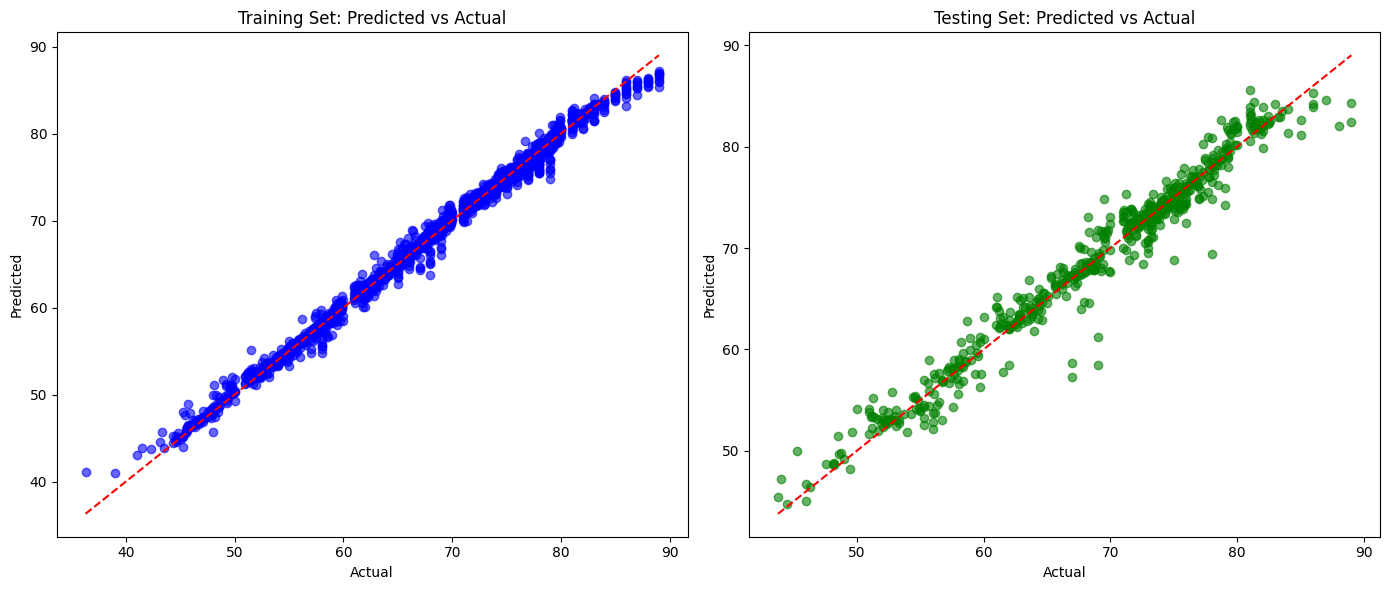

In [42]:
import matplotlib.pyplot as plt

# Plot for Training Set
plt.figure(figsize=(14, 6))

# Predicted vs Actual for Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Training Set: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Predicted vs Actual for Testing Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Testing Set: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


The Predicted vs. Actual plot helps us visually assess how well the model performs. In the training set plot (on the left), the scatter points are close to the red dashed line, indicating that the model's predictions are very close to the actual values. The small spread of points suggests minimal error and a well-fitting model. In the testing set plot (on the right), while the points are still close to the red dashed line, there’s a slightly larger spread, showing that the model performs very well on unseen data but with slightly higher error compared to the training set. The closer the points are to the red line, the more accurate the predictions, and overall, the model shows strong generalization from the training data to the testing data.

This indicates that the model has high accuracy, with a good fit to the data and excellent prediction performance on both training and testing sets.